In [2]:
# Feature Selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, chi2, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load cleaned dataset
df = pd.read_csv('../results/cleaned_dataset.csv')

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']
print("Feature Selection Methods:")
print("1. Random Forest Feature Importance")
print("2. Recursive Feature Elimination (RFE)")
print("3. Chi-Square Test")

Feature Selection Methods:
1. Random Forest Feature Importance
2. Recursive Feature Elimination (RFE)
3. Chi-Square Test


In [3]:
# Method 1: Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance (Random Forest):")
print(feature_importance)


Feature Importance (Random Forest):
     feature  importance
7    thalach    0.128958
2         cp    0.128565
12      thal    0.115899
9    oldpeak    0.111194
11        ca    0.105716
0        age    0.088415
4       chol    0.076707
3   trestbps    0.073438
8      exang    0.058126
10     slope    0.054683
1        sex    0.030894
6    restecg    0.019554
5        fbs    0.007851


In [4]:
# Method 2: Recursive Feature Elimination
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=8)
rfe.fit(X, y)

rfe_features = pd.DataFrame({
    'feature': X.columns,
    'selected': rfe.support_,
    'ranking': rfe.ranking_
}).sort_values('ranking')

print(f"\nRFE Selected Features:")
print(rfe_features[rfe_features['selected']])



RFE Selected Features:
     feature  selected  ranking
0        age      True        1
2         cp      True        1
3   trestbps      True        1
4       chol      True        1
7    thalach      True        1
12      thal      True        1
11        ca      True        1
9    oldpeak      True        1


In [5]:
# Method 3: Statistical Tests (F-score for classification)
f_selector = SelectKBest(score_func=f_classif, k=8)
f_selector.fit(X, y)

f_scores = pd.DataFrame({
    'feature': X.columns,
    'f_score': f_selector.scores_
}).sort_values('f_score', ascending=False)

print(f"\nF-Score Rankings:")
print(f_scores)


F-Score Rankings:
     feature     f_score
12      thal  108.663087
8      exang   70.952438
9    oldpeak   68.551439
2         cp   67.009020
7    thalach   65.120104
11        ca   54.559834
10     slope   40.902071
1        sex   25.792191
0        age   16.116700
3   trestbps    6.458169
6    restecg    5.777209
4       chol    2.202983
5        fbs    0.236942


In [6]:
# Visualize feature importance
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 0, 'Importance Score')

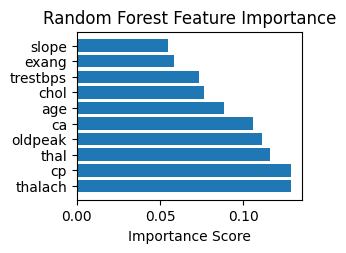

In [7]:
# 1. Random Forest Feature Importance
plt.subplot(2, 2, 1)
top_features = feature_importance.head(10)
plt.barh(top_features['feature'], top_features['importance'])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')


Text(0.5, 0, 'F-Score')

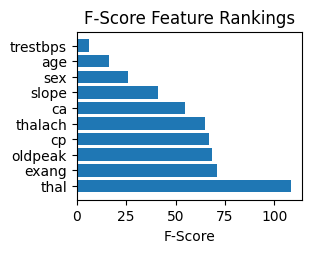

In [8]:

# 2. F-Score Rankings
plt.subplot(2, 2, 2)
top_f_features = f_scores.head(10)
plt.barh(top_f_features['feature'], top_f_features['f_score'])
plt.title('F-Score Feature Rankings')
plt.xlabel('F-Score')

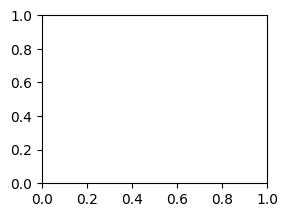

In [9]:
# 3. Feature comparison heatmap
plt.subplot(2, 2, 3)
# Combine all methods
comparison_df = pd.DataFrame({
    'RF_Importance': feature_importance.set_index('feature')['importance'],
    'F_Score': f_scores.set_index('feature')['f_score']
}).fillna(0)

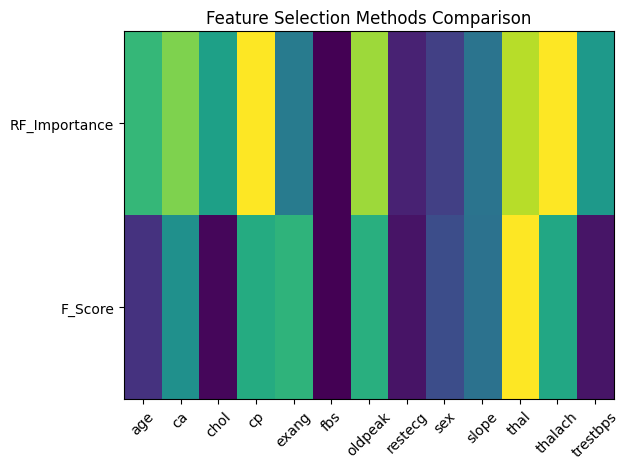

In [10]:
# Normalize scores for comparison
comparison_df['RF_Importance'] = (comparison_df['RF_Importance'] - comparison_df['RF_Importance'].min()) / (comparison_df['RF_Importance'].max() - comparison_df['RF_Importance'].min())
comparison_df['F_Score'] = (comparison_df['F_Score'] - comparison_df['F_Score'].min()) / (comparison_df['F_Score'].max() - comparison_df['F_Score'].min())

plt.imshow(comparison_df.T, aspect='auto', cmap='viridis')
plt.yticks(range(len(comparison_df.columns)), comparison_df.columns)
plt.xticks(range(len(comparison_df.index)), comparison_df.index, rotation=45)
plt.title('Feature Selection Methods Comparison')

plt.tight_layout()
plt.show()

In [11]:

# Select top features (intersection of methods)
top_rf_features = set(feature_importance.head(8)['feature'].tolist())
top_rfe_features = set(rfe_features[rfe_features['selected']]['feature'].tolist())
top_f_features = set(f_scores.head(8)['feature'].tolist())


In [12]:
# Get features that appear in at least 2 methods
selected_features = []
all_features = X.columns
for feature in all_features:
    count = sum([feature in top_rf_features, feature in top_rfe_features, feature in top_f_features])
    if count >= 2:
        selected_features.append(feature)

print(f"\nFinal Selected Features (appearing in ≥2 methods): {selected_features}")



Final Selected Features (appearing in ≥2 methods): ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']


In [13]:
# Create reduced dataset
X_selected = X[selected_features]
reduced_df = X_selected.copy()
reduced_df['target'] = y

print(f"Original features: {X.shape[1]}")
print(f"Selected features: {X_selected.shape[1]}")


Original features: 13
Selected features: 8


In [14]:
# Save reduced dataset
reduced_df.to_csv('../results/selected_features_dataset.csv', index=False)

print("✔️ Reduced dataset with selected features saved")
print("✔️ Feature importance ranking visualization created")

✔️ Reduced dataset with selected features saved
✔️ Feature importance ranking visualization created
